# Imports

In [1]:
import os
import json
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

In [3]:
%run ../mimic_cxr.py

In [4]:
DICOM_DIR = os.path.join(DATASET_DIR.replace('-jpg', ''), 'files')

# Dicom files

In [5]:
import pydicom as pydcm

In [6]:
%run ../../utils/dicom.py

In [130]:
name = 'p19/p19974002/s52374783/76b55d6d-492245e2-c56a31ae-9f0d1cf4-78005e3b.dcm'
# name = 'p19/p19001252/s52265893/431f9ba5-9f643a52-6557b9e3-63ada8e0-c05a6365.dcm'
fpath = os.path.join(DICOM_DIR, name)

In [131]:
dicom = pydcm.read_file(fpath)
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.157790604156611645238129320707018792180
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.55362949469033348352269585565668676650
(0002, 0013) Implementation Version Name         SH: 'MIMIC-CXR v2.0.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 2.25.15779060415661164523812932070701

In [132]:
dicom['WindowWidth'], dicom['WindowCenter']

((0028, 1051) Window Width                        DS: "4096.0",
 (0028, 1050) Window Center                       DS: "2048.0")

In [94]:
from typing import cast, List

In [97]:
elem = ds['WindowWidth']
width = cast(List[float], elem.value)[index] if elem.VM > 1 else elem.value
width = cast(float, width)
width

"1023.0"

In [98]:
elem = ds['WindowCenter']
center = (
    cast(List[float], elem.value)[index] if elem.VM > 1 else elem.value
)
center = cast(float, center)
center

"511.0"

In [109]:
y_min = 0
y_max = 2**ds.BitsStored - 1
y_range = y_max - y_min
arr = arr.astype('float64')

In [102]:
below = arr <= (center - width / 2)
above = arr > (center + width / 2)
between = np.logical_and(~below, ~above)

In [110]:
arr[below] = y_min
arr[above] = y_max
if between.any():
    arr[between] = (
        ((arr[between] - center) / width + 0.5) * y_range + y_min
    )

In [113]:
arr.min(), arr.max(), arr.dtype

(0.0, 1023.0, dtype('float64'))

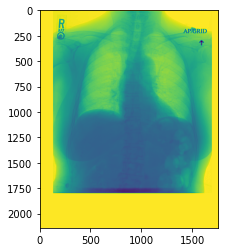

In [111]:
plt.imshow(arr)

In [86]:
'RescaleSlope' in dicom, 'RescaleIntercept' in dicom

(False, False)

In [82]:
dicom.BitsStored

10

In [87]:
ds = dicom

In [133]:
arr = dicom.pixel_array
arr.shape, arr.dtype

((3056, 2544), dtype('uint16'))

In [134]:
arr2 = dicom_to_np(dicom)
arr2.shape, arr.dtype

((3056, 2544), dtype('uint16'))

0.0 4037.0 2249.313380961054 988.2034462426685
0 4037 2249.313380961054 988.2034462426685


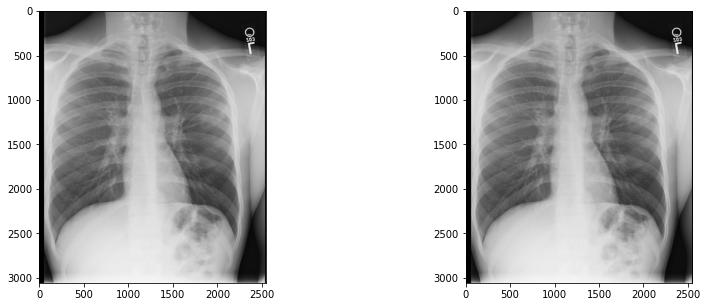

In [135]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(arr2, cmap='gray')
p(arr2)

plt.subplot(1, 2, 2)
plt.imshow(arr, cmap='gray')
p(arr)

In [136]:
image = Image.fromarray(arr, mode='I;16')
arr3 = np.array(image, dtype=np.uint16)
image.mode, image.size, arr3.dtype, arr3.shape

('I;16', (2544, 3056), dtype('uint16'), (3056, 2544))

In [78]:
image2 = Image.frombuffer(
    'I;16', (dicom.Columns, dicom.Rows), arr2, 'raw', 'I;16', 0, 1,
)
arr4 = np.array(image2, dtype=np.uint16)
image2.mode, image2.size, arr4.dtype, arr4.shape

('I;16', (1760, 2140), dtype('uint16'), (2140, 1760))

In [137]:
p = lambda a: print(a.min(), a.max(), a.mean(), a.std())
p(arr2)
p(arr3)
p(arr4)

0.0 4037.0 2249.313380961054 988.2034462426685
0 4037 2249.313380961054 988.2034462426685
0 65473 22289.850274798217 19733.905976727743


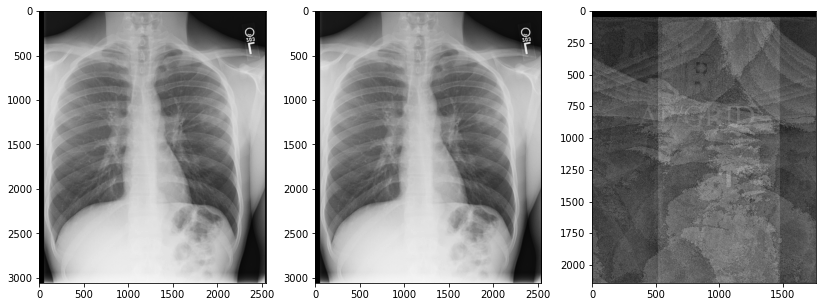

In [138]:
plt.figure(figsize=(14, 5))

n_rows = 1
n_cols = 3

plt.subplot(n_rows, n_cols, 1)
plt.imshow(arr2, cmap='gray')

plt.subplot(n_rows, n_cols, 2)
plt.imshow(arr3, cmap='gray')

plt.subplot(n_rows, n_cols, 3)
plt.imshow(arr4, cmap='gray')